In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


## Data Cleaning

In [6]:
df['Production (Tons)']= df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df['Production (Tons)'].isnull().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [10]:
df['Production (Tons)']=pd.to_numeric(df['Production (Tons)'],errors='coerce')

In [11]:
# now let's remove the spaces from the column names
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'ProductionperPerson(Kg)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)

df.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
df.isnull().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [13]:
df[df['Yield(Kg/Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [14]:
df.tail(5)

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8
102,102,Syria,Asia,1,0,0,83034.2


In [15]:
df=df.dropna().reset_index(drop=True)

df.tail()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,11949.8
101,102,Syria,Asia,1,0,0,83034.2


In [16]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [17]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df.dtypes

Country                    object
Continent                  object
Production(Tons)            int64
ProductionperPerson(Kg)    object
Acreage(Hectare)           object
Yield(Kg/Hectare)          object
dtype: object

In [19]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['ProductionperPerson(Kg)']=df['ProductionperPerson(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [20]:
df.dtypes

Country                     object
Continent                   object
Production(Tons)           float64
ProductionperPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

# Univariate Analysis

### How many countries produces sugarcane from each continent?

In [21]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='count'>

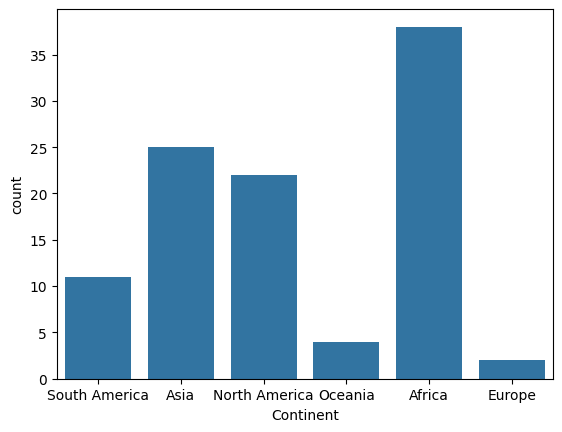

In [22]:
sns.countplot(x='Continent',data=df)

# it is same as writiing df['Continent'].value_counts().plot(kind='bar')

### Let's find the probability distribution of the 4 numerical columns

C:\Users\admin\AppData\Local\Temp\ipykernel_15152\2102318312.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15152\2102318312.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ProductionperPerson(Kg)'])
C:\Users\admin\

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

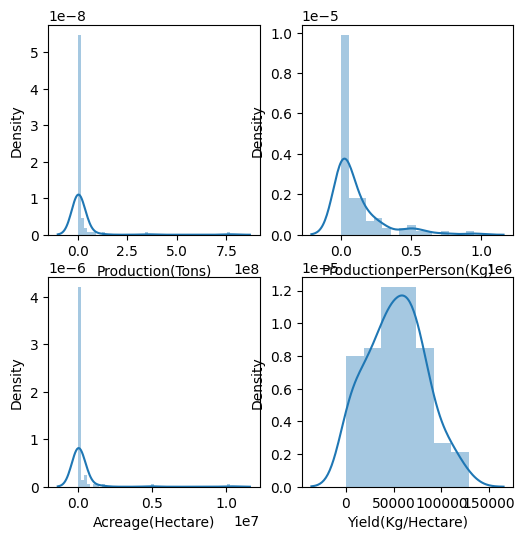

In [23]:

plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['ProductionperPerson(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

## Let's see which countries produce most sugarcane

In [24]:
# although the data frame is sorted in the order of production but you can also manually do this.

In [25]:
df_new=df[['Country','Production(Tons)']]
df_new.head()

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0


In [26]:
df_new.set_index(keys='Country')

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [27]:
df_new['production_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_15152\3008291522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['production_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()


In [28]:
df_new.head()

,Country,Production(Tons),production_percent
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


In [29]:
df_new.sort_values(by='production_percent',inplace=True,ascending=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_15152\575070081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.sort_values(by='production_percent',inplace=True,ascending=False)


C:\Users\admin\AppData\Local\Temp\ipykernel_15152\216392973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_new.head(10), x='Country',y='production_percent',palette='bright')


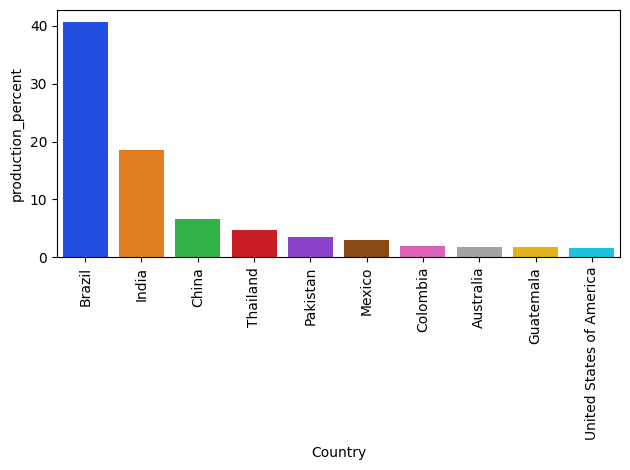

In [30]:
ax=sns.barplot(data=df_new.head(10), x='Country',y='production_percent',palette='bright')
plt.xticks(rotation=90)
plt.tight_layout()

# palette is used to provide different colours to bars. We can also provide a list to palette specifying colour for each bar.

In [31]:
# Similarly we can sort values on the basis of other factors

## Correlation

In [32]:
df.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [38]:
df.corr(numeric_only=True)

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
ProductionperPerson(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

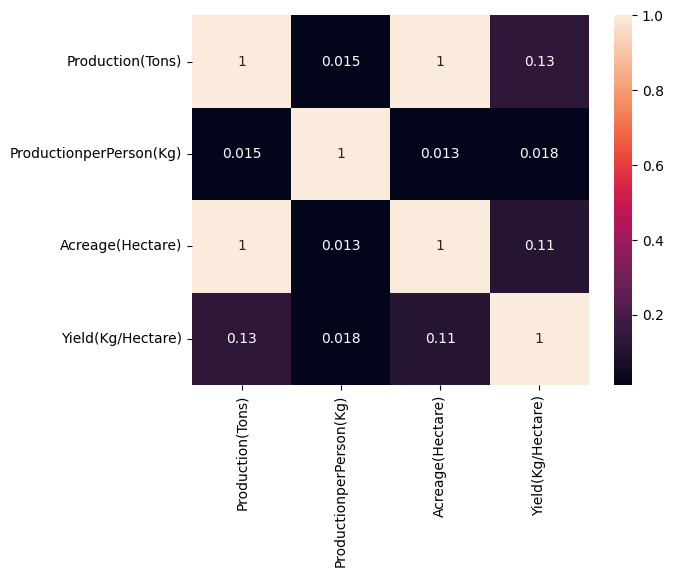

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

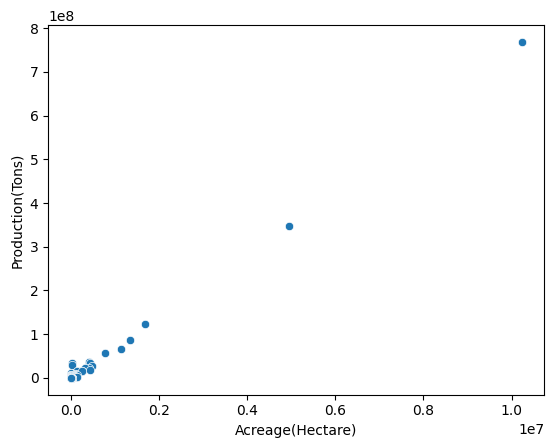

In [43]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)')
# We can clearly see that as the land size increase the total production also increases

## Which continent produces maximum sugarcane?

In [44]:
df_continent=df.groupby(by='Continent')

In [47]:
x=df_continent.sum().sort_values(by='Production(Tons)',ascending=False)
x

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9


<Axes: xlabel='Continent'>

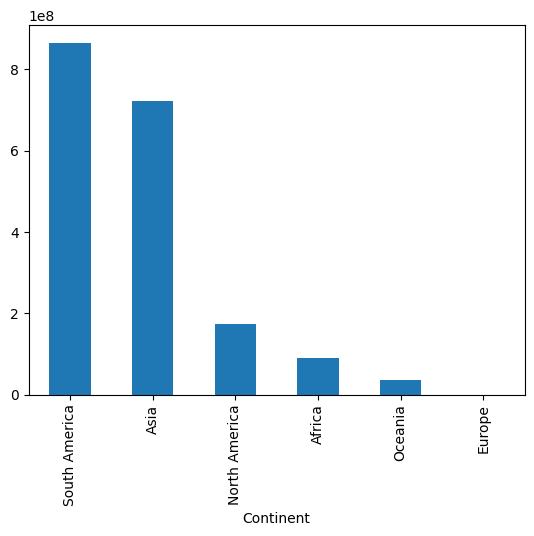

In [48]:
x['Production(Tons)'].plot(kind='bar')

## Do continents with higher number of countries affect production?

In [49]:
# Let's do this with the help of a line plot

In [73]:
x['number_of_countries']=df_continent.count()['Country']
x
# del x['country']

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,36177574.0,28593.605,490909.0,162419.1,4
Europe,5823.0,536.000,71.0,131870.9,2


In [74]:
countries=x.index.to_list()
countries

['South America', 'Asia', 'North America', 'Africa', 'Oceania', 'Europe']

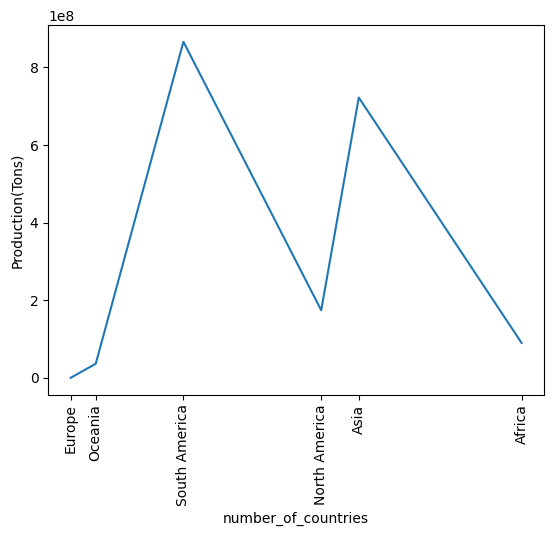

In [77]:
sns.lineplot(data=x,x='number_of_countries',y='Production(Tons)')
plt.xticks(ticks=x['number_of_countries'],labels=countries,rotation=90)
plt.show()
# ticks helps specifies the positions where you want to insert the labels
# labels are the name of those positions